In [1]:
%%time
import random
from math import exp, sqrt

S0 = 100    # 初期値
r = 0.05    # 定数の短期金利
T = 1.0     # 年単位の時間軸
sigma = 0.2 # 定数のボラティリティファクター

values = []

for _ in range(1000000):
    ST = 50 * exp((r - 0.5 * sigma ** 2) * T +
                  sigma * random.gauss(0, 1) * sqrt(T))
    values.append(ST)

CPU times: total: 1.41 s
Wall time: 1.43 s


In [2]:
%%time
import numpy as np

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                 sigma * np.random.standard_normal(1000000) *
                 np.sqrt(T))

CPU times: total: 125 ms
Wall time: 193 ms


In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
print(mpl.style.available)

mpl.style.use('seaborn-v0_8-talk')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
import configparser
config = configparser.ConfigParser()
config.read('../config')

['../config']

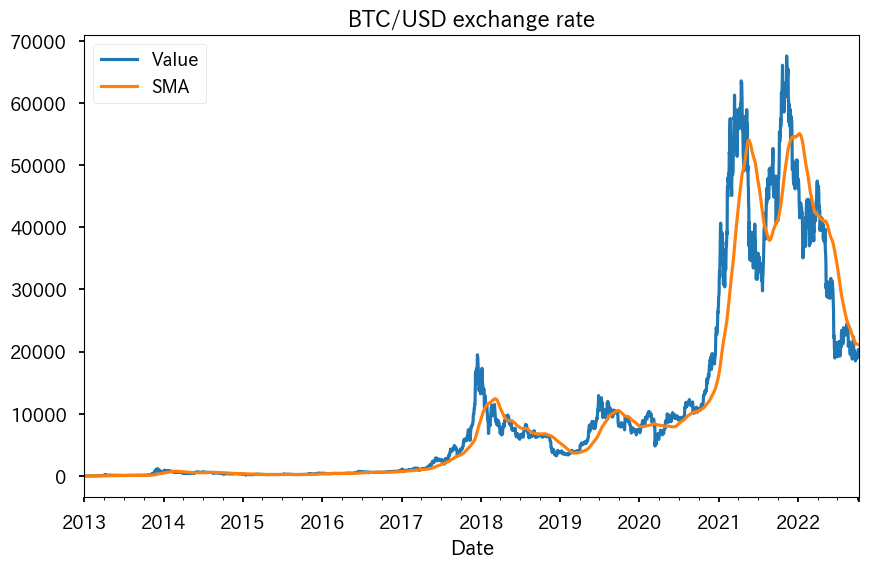

In [5]:
import quandl as q
q.ApiConfig.api_key = config['nasdaq']['api']
d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean() # 100日SMAをベクトル化して計算
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate',
                        figsize=(10, 6))
plt.show()